In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, IBMQ
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
# Getting rid of unnecessary warnings
import warnings
from matplotlib.cbook import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)
from qiskit.tools.visualization import plot_histogram

# Importing standard Qiskit libraries
from qiskit.compiler import transpile, assemble
#from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library.standard_gates import XGate
from qiskit.circuit.library.standard_gates import RZGate
import math
from scipy import linalg
from numpy.linalg import solve
import scipy.stats
# from qulacs import QuantumState
# from qulacs import QuantumCircuit
# from qulacs.gate import DenseMatrix
# from qulacs.circuit import QuantumCircuitOptimizer
# from qulacsvis import circuit_drawer

#並列処理をするために
from multiprocessing import Pool
from multiprocessing import Process
"""
def function(hoge):
    #やりたいこと
    return x

def multi(n):
    p = Pool(10) #最大プロセス数:10
    result = p.map(function, range(n))
    return result

def main():
    data = multi(20)
    for i in data:
        print(i)

main()

この場合だと、「0,1,2・・・19と値を変化させてfunctionを20回実行する」という処理になります。
functionの返値はresultにリストで入っているので、受け取って標準出力しています。

また、私の環境では12コア（正確には6コア12スレッド）まで使えるので最大プロセス数は10としました。
最大まで使うとブラウザを開くのも一苦労になるのでやめておいた方が無難です。


"""

def bin4(m,a,b):#mをa桁の2進数にした時のb桁目
    m=int(m)
    #print(f'(m,a,b)=({m},{a},{b})')
    l = [*map(int,f"{format(m,'b'):>0{a}}")]
    return l[a-1-b]

def bin5(m,a):#mをa桁の2進数にした時の配列を返す
    m=int(m)
    #print(f'(m,a,b)=({m},{a},{b})')
    l = [*map(int,f"{format(m,'b'):>0{a}}")]
    return l
def bin6(m,a):#mをa桁の2進数にした時の配列(文字列)を返す
    m=int(m)
    #print(f'(m,a,b)=({m},{a},{b})')
    l = [*map(int,f"{format(m,'b'):>0{a}}")]
    l=str(l).replace('[','').replace(']','').replace(',','').replace(' ','')
    return l

def decimal(n,a):#長さnのaという01配列を10進数に変換。
    answer=0
    for i in range(n):
        answer+=pow(2,n-1-i)*a[i]
        #answer+=pow2(n-1-i)*a[i]
    return answer


phi=Parameter('phi')
C2X=XGate().control(2)
C3X=XGate().control(3)
C4X=XGate().control(4)
C5X=XGate().control(5)
C6X=XGate().control(6)
C7X=XGate().control(7)
C8X=XGate().control(8)
C9X=XGate().control(9)
C10X=XGate().control(10)
C11X=XGate().control(11)
C1RZ=RZGate(phi).control(1)
C2RZ=RZGate(phi).control(2)
C3RZ=RZGate(phi).control(3)
C4RZ=RZGate(phi).control(4)
C5RZ=RZGate(phi).control(5)
C6RZ=RZGate(phi).control(6)
C7RZ=RZGate(phi).control(7)
C8RZ=RZGate(phi).control(8)
C9RZ=RZGate(phi).control(9)

def MCRZ(bit,n,qc,q,degree):
    #使い方の例：MCRZ(gate2[i],n,qc,q,B[i])
    m=sum(bit[0:n])
    a=[0 for i in range(n)]
    count=0
    for i in range(n):
        if bit[i]==1:
            a[count]=i
            count+=1
    a[m]=bit[n]#a[m]にtargetbitの場所
    #print(a)
    if m==0:
        qc.rz(degree,a[0])
    elif m==1:
        qc.crz(degree,a[0],a[1])
    elif m==2:
        qc.append(RZGate(degree).control(2),[a[0],a[1],a[2]])
    elif m==3:
        qc.append(RZGate(degree).control(3),[a[0],a[1],a[2],a[3]])
    elif m==4:
        qc.append(RZGate(degree).control(4),[a[0],a[1],a[2],a[3],a[4]])
    elif m==5:
        qc.append(RZGate(degree).control(5),[a[0],a[1],a[2],a[3],a[4],a[5]])
    elif m==6:
        qc.append(RZGate(degree).control(6),[a[0],a[1],a[2],a[3],a[4],a[5],a[6]])
    elif m==7:
        qc.append(RZGate(degree).control(7),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7]])
    elif m==8:
        qc.append(RZGate(degree).control(8),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8]])
    elif m==9:
        qc.append(RZGate(degree).control(9),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9]])
    elif m==10:
        qc.append(RZGate(degree).control(10),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10]])
    elif m==11:
        qc.append(RZGate(degree).control(11),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11]])
    elif m==12:
        qc.append(RZGate(degree).control(12),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],a[12]])
    elif m==13:
        qc.append(RZGate(degree).control(13),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],a[12],a[13]])
    elif m==14:
        qc.append(RZGate(degree).control(14),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],a[12],a[13],a[14]])
    elif m==15:
        qc.append(RZGate(degree).control(15),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],a[12],a[13],a[14],a[15]])
    elif m==16:
        qc.append(RZGate(degree).control(16),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],a[12],a[13],a[14],a[15],a[16]])
    elif m==17:
        qc.append(RZGate(degree).control(17),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],a[12],a[13],a[14],a[15],a[16],a[17]])
    elif m==18:
        qc.append(RZGate(degree).control(18),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],a[12],a[13],a[14],a[15],a[16],a[17],a[18]])
    elif m==19:
        qc.append(RZGate(degree).control(19),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],a[12],a[13],a[14],a[15],a[16],a[17],a[18],a[19]])
    elif m==20:
        qc.append(RZGate(degree).control(20),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],a[12],a[13],a[14],a[15],a[16],a[17],a[18],a[19],a[20]])
    elif m==21:
        qc.append(RZGate(degree).control(21),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],a[12],a[13],a[14],a[15],a[16],a[17],a[18],a[19],a,[20],a[21]])
    elif m==22:
        qc.append(RZGate(degree).control(22),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],a[12],a[13],a[14],a[15],a[16],a[17],a[18],a[19],a[20],a[21],a[22]])
    elif m==23:
        qc.append(RZGate(degree).control(23),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],a[12],a[13],a[14],a[15],a[16],a[17],a[18],a[19],a[20],a[21],a[22],a[23]])
    elif m==24:
        qc.append(RZGate(degree).control(24),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],a[12],a[13],a[14],a[15],a[16],a[17],a[18],a[19],a[20],a[21],a[22],a[23],a[24]])
    elif m==25:
        qc.append(RZGate(degree).control(25),[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],a[12],a[13],a[14],a[15],a[16],a[17],a[18],a[19],a[20],a[21],a[22],a[23],a[24],a[25]])

def MCX(m,qc):
    if m==3:
        qc.append(C2X,[0,1,2])
    elif m==4:
        qc.append(C3X,[0,1,2,3])
    elif m==5:
        qc.append(C4X,[0,1,2,3,4])
    elif m==6:
        qc.append(C5X,[0,1,2,3,4,5])
    elif m==7:
        qc.append(C6X,[0,1,2,3,4,5,6])
    elif m==8:
        qc.append(C7X,[0,1,2,3,4,5,6,7])
    elif m==9:
        qc.append(C8X,[0,1,2,3,4,5,6,7,8])
    elif m==10:
        qc.append(C9X,[0,1,2,3,4,5,6,7,8,9])
    elif m==11:
        qc.append(C10X,[0,1,2,3,4,5,6,7,8,9,10])
    elif m==12:
        qc.append(C11X,[0,1,2,3,4,5,6,7,8,9,10,11])


def function_n(n,ki,kw,kw_n):#kiは1次元(n**2)ベクトル、kwは2次元(n**2,kw_n)ベクトル
    bit=np.array([[0 for i in range(n)] for j in range(pow(2,n))], dtype=object)
    gate=np.array([[0 for i in range(n)] for j in range(pow(2,n))], dtype=object)
    gate2=np.array([[0 for i in range(n+1)] for j in range(pow(2,n))], dtype=object)#gate2行列を横に1つ拡張してtargetbitの場所を記録する。
    A=np.array([[0.0 for i in range(pow(2,n))] for j in range(pow(2,n))])#入るのは0,±1/2
    constant1=np.array([0.0 for i in range(pow(2,n))])#連立方程式の定数部分
    constant2=np.array([0.0 for i in range(pow(2,n))])#連立方程式の定数部分
    constant3=np.array([[0.0 for i in range(pow(2,n))] for j in range(pow(2,n))])
    B=np.array([0.0 for i in range(pow(2,n))])
    C=np.array([0.0 for i in range(pow(2,n))])
    D=np.array([[0.0 for i in range(pow(2,n))] for j in range(kw_n)])
    E=np.array([[0.0 for i in range(pow(2,n))] for j in range(kw_n)])
    FLAG=np.array([0 for i in range(pow(2,n))])
    X=np.array([0 for i in range(n)])
    for i in range(0,pow(2,n)):
        for j in range(0,n):
            bit[i][n-1-j]=bin4(i,n,j)
        #print(bit[i]) #0-pow(2,n)の2進数表記

    #gateを作成する。上から1の数が小さい順に並び変える。今回は下の方のbitを優先してcontrol bitにして適用される画素に偏りをなくす。
    a=1 #aは作成する行列の縦向きの番号,0番目は00...0で入力済み
    for i in range(1,n+1):
        for j in range(0,2**n):
            if sum(bit[2**n-j-1])==i:
                gate[a]=bit[2**n-j-1]
                a+=1

    #gate2を作成する。連立方程式で使う変数は2**n-1個(|00...0>は変化させない)だからその分だけ作る。gateで0になっている部分を1つだけ選んでその場所を一番右に記録する,gateより横に１つ大きい。
    a=1 #0行目は便宜的なもの。
    for i in range(0,2**n):
        for j in range(0,n):
            if gate[i][j]==0:
                for k in range(n):
                    gate2[a][k]=gate[i][k]
                gate2[a][n]=j
                a+=1
                #print(a)
            if a==2**n:
                break
        else:
            continue
        break
    #for i in range(2**n):
        #print(gate2[i])

    #ゲート毎の表を作成する。
    vertical_of_A=np.zeros(n)
    for i in range(0,2**n):
        for j in range(0,2**n):
            for k in range(0,n):
                vertical_of_A[k]=gate[j][k]-bit[i][k]#これに1が含まれていたらgateがbitを超越しているということ。
            if 1 not in vertical_of_A and bit[i][gate2[j][n]]==0:
                A[i][j]=-1/2
            elif 1 not in vertical_of_A and bit[i][gate2[j][n]]==1:
                A[i][j]=1/2
        constant1[i]=(pi/2)*(np.count_nonzero(A[i]!=0))#False(=0)ではないという意味
    #for i in range(2**n):
        #print(A[i])
    #print(A.shape)        
    # constant2=ki-constant1-np.mean(ki-constant1)
    constant2=ki-constant1
    B=solve(A,constant2)
    #B=np.dot(np.linalg.inv(A),ki-constant)
    #invは行列式が0にならない正則行列の逆行列を求める(行列式が0では逆行列がない)
    #pinvは疑似的に逆行列を求めてくれる。
    #B=np.dot(np.linalg.pinv(A),ki-constant)
    B=B%(2*pi)

    for i in range(0,kw_n):
        for j in range(0,2**n):
            D[i][j]=(sum(bit[j])%2)*pi-kw[j]
        #E[i]=np.dot(np.linalg.inv(A),D[i]-constant)
        #E[i]=np.dot(np.linalg.pinv(A),D[i]-constant)
        constant3[i]=D[i]-constant1-np.mean(D[i]-constant1)
        E[i]=solve(A,constant3[i])
        E[i]=E[i]%(2*pi)

    q = QuantumRegister(n+1, 'q')
    c = ClassicalRegister(1, 'c')
    qc = QuantumCircuit(q, c)
    
    for i in range(n):
        qc.h(i)
        qc.barrier(i)
    for i in range(1,pow(2,n)):
            MCRZ(gate2[i],n,qc,q,B[i])
    for i in range(kw_n):
        for j in range(1,pow(2,n)):
            MCRZ(gate2[j],n,qc,q,E[i][j])
    qc.append(RZGate(0).control(9),[0,1,2,3,4,5,6,7,8,9])
    for i in range(n):
        qc.h(i)
    MCX(n+1,qc)
    qc.measure(q[n],c[0])
    qc.draw("mpl")
    
    #shots=1048576
    shots=1024
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend = simulator, shots=shots).result()
    counts = result.get_counts(qc)
    num_ones = counts.get('1', 0)/shots
   

    #print(B)
    #for i in range(1024):
    #    print(A[i])
    #print(np.sin(np.dot(A,B)))
    #print(np.sin(constant2))
    
    return num_ones, qc

<ipython-input-1-32d0f1f299d0>:9: MatplotlibDeprecationWarning: MatplotlibDeprecationWarning was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  from matplotlib.cbook import MatplotlibDeprecationWarning


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
zeros_original=np.zeros((100,28,28))
ones_original=np.zeros((100,28,28))
i=0
j=0
k=0
while i<100 or j<100:
    if train_labels[k]==0 and i<100:
        zeros_original[i]=train_images[k]
        i+=1
    elif train_labels[k]==1 and j<100:
        ones_original[j]=train_images[k]
        j+=1
    k+=1

zeros_32=np.zeros((100,32,32))
ones_32=np.zeros((100,32,32))
for i in range(0,100):
   for j in range(0,28):
       for k in range(0,28):
           zeros_32[i][j+2][k+2]=zeros_original[i][j][k]
           ones_32[i][j+2][k+2]=ones_original[i][j][k]
        
zeros_row_32=np.zeros((100,1024))
ones_row_32=np.zeros((100,1024))
for i in range(100):
    for j in range(32):
        for k in range(32):
            zeros_row_32[i][j*32+k]=zeros_32[i][j][k]
            ones_row_32[i][j*32+k]=ones_32[i][j][k]
            #-128~127のグレースケールへ

from PIL import Image
zeros_8=np.zeros((100,8, 8))
ones_8=np.zeros((100,8,8))
for i in range(100):
    zeros_8[i]=np.asarray(Image.fromarray(np.uint8(zeros_original[i])).resize((8,8)))
    ones_8[i]=np.asarray(Image.fromarray(np.uint8(ones_original[i])).resize((8,8)))

zeros_row_8=np.zeros((100,64))
ones_row_8=np.zeros((100,64))
for i in range(100):
    for j in range(8):
        for k in range(8):
            zeros_row_8[i][j*8+k]=zeros_8[i][j][k]-128
            ones_row_8[i][j*8+k]=ones_8[i][j][k]-128
            #-128~127のグレースケールへ

In [3]:
#print(scipy.stats.bernoulli.rvs(0.1))#このカッコ内の数字は期待値
def loss_func(n,kw,kw_n):#このkwは2次元(2**n×kw_n)
    EE=0.0
    for i in range(20):
        #print(f'i={i}')
        result_zero,qc_zero=function_n(n,zeros_row_8[i]*pi/256,kw,kw_n)
        result_one,qc_one=function_n(n,ones_row_8[i]*pi/256,kw,kw_n)
        EE=EE+pow(result_zero,2)+pow(result_one-1,2)
    return EE

def step(x):
    return 1.0 * (x > 0.0)#x=0.0がTrueなら1,Falseなら0をかける.改造済み.

def EEE(mm,n,EneMin,Ene,kw,kw_n):#mmは修正回数,kwは2**n×kw_nの二次元配列
    s=np.zeros((mm,kw_n,2**n))
    for i in range(mm):
        for j in range(kw_n):
            for k in range(pow(2,n)):
                s[i][j][k]=1-2*scipy.stats.bernoulli.rvs(0.5)#0/1の乱数から-1/1の乱数を作る。0なら1,1なら-1になる。
        """
        kw_array=np.zeros(kw_n)
        for j in range(kw_n):
            kw_array[j]=decimal(pow(2,n),(bin5(kw[i][j],pow(2,n))+s[i][j])%2)#kw群を一旦配列に格納
        """
        Ene[i+1]=loss_func(n,kw,kw_n)#重みをkw_n重にしてコスト関数実行！
        LOSS=Ene[i+1]-EneMin[i]#ここが負になっていれば更新、正だったら下のループに入らなくてもいい?!
        for j in range(kw_n):
            kw[i+1][j]=decimal(pow(2,n),(bin5(kw[i][j],pow(2,n))+step((-LOSS*s[i][j])))%2)
        #if(LOSS<0):kw[i+1]=kw_arrayと同値のはず。
        EneMin[i+1]=Ene[i+1]*step(-LOSS)+EneMin[i]*step(LOSS)#LOSSが負だったら更新、正だったら維持。if文使えばいいけどただstep関数使いたかっただけ。
            #これってただ単にランダムで重みを変化させてもし損失関数が減少すればその重みを採用するというだけで、微分はあまり意味を為してないのではないか。
            #LOSSが負になったときにkwにdkwの10進数変換したものを足すのと同値では？あとこの下の行の代入値はLOSS=の1項目と同じになる気がする。
            #ひらめき：そもそもkwの2進数表記の各桁は独立しているのに、dkwを足して繰り上がることがあるのがおかしい。dkwで1の桁は0/1が切り替わるという意味であるべき。
        #EEが増えたらkwは更新されない
        print(f'EneMin[{i+1}]={EneMin[i+1]}')
        print(f'Ene[{i+1}]={Ene[i+1]}')
        print(f'kw[{i+1}]={kw[i+1]}')

In [4]:
original_kw_8=np.array([0.34 for i in range(pow(2,6))])
original_kw_32=np.array([0.5 for i in range(pow(2,10))])
#result1, qc1 = function_n(6,zeros_row_8[4]*pi/256,kw_8,1)
#result2, qc2 = function_n(6,ones_row_8[4]*pi/256,kw_8,1)
#result3, qc3 = function_n(10,zeros_row_32[4]*pi/256,kw_32,1)
#print(function_n(6,zeros_row[4]*pi/256,kw,1))
#print(function_n)

In [5]:
ki1=np.zeros((100,16,32,32))
for i in range(100):
    for j in range(16):
        for k in range(28):
            for l in range(28):
                ki1[i][j][j//4+1+k][j%4+1+l]=zeros_original[i][k][l]

In [6]:
#qc3.draw('mpl')
def multi(n):
    p = Pool(32) #max process number :10
    result = p.map(main_calculation, range(n))
    # result = map(main_calculation, range(n))
    #either commentout upper 2lines or latter one.
    return n,result#interator, take out by for-sentences.
def main():
    i,data = multi(314)
    for j in data:
        pass
results_zeros_0=np.array([0.0 for i in range (314)])
bottom=np.array([0.0 for i in range (314)])

def main_calculation(i):
    kw_32=np.array([i/100 for j in range (pow(2,10))])
    results_zeros_0[i]=function_n(10,zeros_row_32[0]*pi/256,kw_32,1)[0]
    bottom[i]=i/100
    print(f"i={i}:{results_zeros_0[i]}")
    return results_zeros_0[i]
    
# main()
# plt.plot(bottom,results_zeros_0)

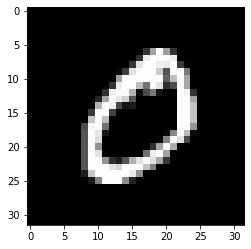

In [7]:
plt.imshow(zeros_32[0],cmap='gray')

In [8]:
# scp hayashi@192.168.202.5:/home/hayashi/CRZtrial3_result.ipynb CRZtrial3.ipynb
# scp CRZtrial3.ipynb hayashi@192.168.202.5:/home/hayashi/
# ssh hayashi@192.168.202.5

In [9]:
def bin4(m,a,b):#mをa桁の2進数にした時のb桁目
    m=int(m)
    #print(f'(m,a,b)=({m},{a},{b})')
    l = [*map(int,f"{format(m,'b'):>0{a}}")]
    return l[a-1-b]
from numpy import pi
import numpy as np
from numpy.linalg import solve
# n=2
def function_n2(n,m,ki):#kiは1次元(n**2)ベクトル、kwは2次元(n**2,kw_n)ベクトル
    vertical_of_A=np.zeros(n)
    bit=np.array([[0 for i in range(n)] for j in range(pow(2,n))], dtype=object)
    gate=np.array([[0 for i in range(n)] for j in range(pow(2,n))], dtype=object)
    gate2=np.array([[0 for i in range(n+1)] for j in range(pow(2,n))], dtype=object)#gate2行列を横に1つ拡張してtargetbitの場所を記録する。
    A=np.array([[0.0 for i in range(pow(2,n))] for j in range(pow(2,n))])#入るのは0,±1/2
    constant1=np.array([0.0 for i in range(pow(2,n)-2)])#連立方程式の定数部分
    constant2=np.array([0.0 for i in range(pow(2,n)-2)])#連立方程式の定数部分
    constant3=np.array([[0.0 for i in range(pow(2,n))] for j in range(pow(2,n))])
    B=np.array([0.0 for i in range(pow(2,n)-2)])
    C=np.array([[0.0 for i in range(pow(2,n)-2)] for j in range(pow(2,n)-2)])
    # D=np.array([[0.0 for i in range(pow(2,n))] for j in range(kw_n)])
    # E=np.array([[0.0 for i in range(pow(2,n))] for j in range(kw_n)])
    FLAG=np.array([0 for i in range(pow(2,m))])
    FLAG2=np.array([[1 for i in range(n+m+1)] for j in range(2**m)], dtype=object)
    X=np.array([[0 for i in range(m)] for j in range(2**m)], dtype=object)
    kw=np.array([pi/4 for i in range(2**m)])
    for i in range(0,pow(2,n)):
        for j in range(0,n):
            bit[i][n-1-j]=bin4(i,n,j)
        #print(bit[i]) #0-pow(2,n)の2進数表記
    #gateを作成する。上から1の数が小さい順に並び変える。今回は下の方のbitを優先してcontrol bitにして適用される画素に偏りをなくす。
    a=1 #aは作成する行列の縦向きの番号,0番目は00...0で入力済み
    for i in range(1,n+1):
        for j in range(0,2**n):
            if sum(bit[2**n-j-1])==i:
                gate[a]=bit[2**n-j-1]
                a+=1
    #gate2を作成する。連立方程式で使う変数は2**n-1個(|00...0>は変化させない)だからその分だけ作る。gateで0になっている部分を1つだけ選んでその場所を一番右に記録する,gateより横に１つ大きい。
    a=0 #0行目は便宜的なもの。いや、Rzゲート使うから必要(20221130追記&コード変更)。
    for i in range(0,2**n):
        for j in range(0,n):
            if gate[i][j]==0:
                for k in range(n):
                    gate2[a][k]=gate[i][k]
                gate2[a][n]=j
                a+=1
                break
                #print(a)
        if a==2**n:
                break
        else:
            continue
    for i in range(0,2**n):
        for j in range(0,2**n):
            for k in range(0,n):
                vertical_of_A[k]=gate[j][k]-bit[i][k]#これに1が含まれていたらgateがbitを超越しているということ。
            if 1 not in vertical_of_A and bit[i][gate2[j][n]]==0:
                A[i][j]=-1
            elif 1 not in vertical_of_A and bit[i][gate2[j][n]]==1:
                A[i][j]=1
    for i in range(2**n-2):
        for j in range(2**n-2):
            C[i][j]=A[i+1][j+1]
    for i in range(2**n-2):
        constant1[i]=(pi)*(np.count_nonzero(C[i]!=0))
    constant2=ki-constant1
    B=solve(C,constant2)
    #B=np.dot(np.linalg.inv(A),ki-constant)
    #invは行列式が0にならない正則行列の逆行列を求める(行列式が0では逆行列がない)
    #pinvは疑似的に逆行列を求めてくれる。
    #B=np.dot(np.linalg.pinv(A),ki-constant)
    B=B%(2*pi)

    for i in range(2**m):
        for j in range(m):
            X[i][j]=bin4(i,m,j)
    for i in range(2**m):
        FLAG[i]=i%m
    for i in range(2**m):
        FLAG2[i][n+FLAG[i]]=0
        FLAG2[i][n+m]=n+FLAG[i]

    q = QuantumRegister(n+m, 'q')
    c = ClassicalRegister(m, 'c')
    qc = QuantumCircuit(q, c)

    for i in range(n+m):
        qc.h(i)
        qc.barrier(i)
    for i in range(0,pow(2,n)-2):
        MCRZ(gate2[i+1],n,qc,q,B[i])
    # for i in range(kw_n):
    #     for j in range(1,pow(2,n)):
    #         MCRZ(gate2[j],n,qc,q,E[i][j])
    # qc.append(RZGate(0).control(9),[0,1,2,3,4,5,6,7,8,9])
    for i in range(n):
        qc.h(i)

    for i in range(2**m):
        for j in range(m):
            if(X[i][j]==0):
                qc.x(n-m+j)
                qc.x(n+j)
        MCRZ(FLAG2[i],n+m,qc,q,kw[i])
        for j in range(m):
            if(X[i][j]==0):
                qc.x(n-m+j)
                qc.x(n+j)

    for i in range(m):
        qc.measure(q[n+i],c[i])


    # MCX(n+1,qc)

    # qc.measure(q[n],c[0])
    qc.draw("mpl")

    #shots=1048576
    shots=1024
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend = simulator, shots=shots, memory=True).result()
    counts = result.get_counts()
    # counts = result.memory(qc)
    print(counts)
    num_ones=np.array([0.0 for i in range(2**m)])
    for i in range(2**m):
        num_ones[i] = (counts.get(bin6(i,m))-shots/(2**m))/(shots/(2**m))
    return qc, num_ones

In [10]:
# ki1=np.array([1.5 for i in range(62)])
# num_ones=np.array([0.0 for i in range(10)])
# qc,original_num_ones=function_n2(14,10,np.ravel(ki1[0]))
# print(original_num_ones)
# qc.draw("mpl")
# for i in range(1024):
#     for j in range(10):
#         if(bin6(i,10)=='1'):
#             num_ones[j]=num_ones[j]+original_num_ones[i]
# print(num_ones)

In [11]:
# ki2=np.array([pi/2 for i in range(256)])
# ki2[12]=ki2[12]+num_ones[0] # # # # # # # #
# ki2[19]=ki2[19]+num_ones[1] # # # # / # # #
# ki2[20]=ki2[20]+num_ones[2] # # # / / # # #
# ki2[26]=ki2[26]+num_ones[3] # # / / / # # #
# ki2[27]=ki2[27]+num_ones[4] # / / / / # # #
# ki2[28]=ki2[28]+num_ones[5] # # # # # # # #
# ki2[33]=ki2[33]+num_ones[6] # # # # # # # #
# ki2[34]=ki2[34]+num_ones[7] # # # # # # # #
# ki2[35]=ki2[35]+num_ones[8]
# ki2[36]=ki2[36]+num_ones[9]
# ki2[77]=ki2[77]+num_ones[0] # # # # # # # #
# ki2[84]=ki2[84]+num_ones[1] # # # # # / # #
# ki2[85]=ki2[85]+num_ones[2] # # # # / / # #
# ki2[91]=ki2[91]+num_ones[3] # # # / / / # #
# ki2[92]=ki2[92]+num_ones[4] # # / / / / # #
# ki2[93]=ki2[93]+num_ones[5] # # # # # # # #
# ki2[98]=ki2[98]+num_ones[6] # # # # # # # #
# ki2[99]=ki2[99]+num_ones[7] # # # # # # # #
# ki2[100]=ki2[100]+num_ones[8]
# ki2[101]=ki2[101]+num_ones[9]
# ki2[148]=ki2[148]+num_ones[0] # # # # # # # #
# ki2[155]=ki2[155]+num_ones[1] # # # # # # # #
# ki2[156]=ki2[156]+num_ones[2] # # # # / # # #
# ki2[162]=ki2[162]+num_ones[3] # # # / / # # #
# ki2[163]=ki2[163]+num_ones[4] # # / / / # # #
# ki2[164]=ki2[164]+num_ones[5] # / / / / # # #
# ki2[169]=ki2[169]+num_ones[6] # # # # # # # #
# ki2[170]=ki2[170]+num_ones[7] # # # # # # # #
# ki2[171]=ki2[171]+num_ones[8]
# ki2[172]=ki2[172]+num_ones[9]
# ki2[213]=ki2[213]+num_ones[0] # # # # # # # #
# ki2[220]=ki2[220]+num_ones[1] # # # # # # # #
# ki2[221]=ki2[221]+num_ones[2] # # # # # / # #
# ki2[227]=ki2[227]+num_ones[3] # # # # / / # #
# ki2[228]=ki2[228]+num_ones[4] # # # / / / # #
# ki2[229]=ki2[229]+num_ones[5] # # / / / / # #
# ki2[234]=ki2[234]+num_ones[6] # # # # # # # #
# ki2[235]=ki2[235]+num_ones[7] # # # # # # # #
# ki2[236]=ki2[236]+num_ones[8]
# ki2[237]=ki2[237]+num_ones[9]
# qc,original_num_ones=function_n2(8,6,ki2[1:255])
# print(original_num_ones)
# qc.draw("mpl")
# num_ones=np.appay([0.0 for i in range(6)])
# for i in range(64):
#     for j in range(6):
#         if(bin6(i,6)=='1'):
#             num_ones[j]=num_ones[j]+original_num_ones[i]
# print(num_ones)

In [12]:
# ki2=np.array([pi/2 for i in range(64)])
# ki2[2]=ki2[2]+num_ones[0] ## # 0 #
# ki2[5]=ki2[5]+num_ones[1] ## 1 # 2
# ki2[7]=ki2[7]+num_ones[2] #3 # 4 #
# ki2[8]=ki2[8]+num_ones[3] ## 5 # #
# ki2[10]=ki2[10]+num_ones[4] 
# ki2[13]=ki2[13]+num_ones[5]
# ki2[29]=ki2[29]+num_ones[0] ## # 1 #
# ki2[18]=ki2[18]+num_ones[1] ## 2 # 3
# ki2[21]=ki2[21]+num_ones[2] #4 # 5 #
# ki2[23]=ki2[23]+num_ones[3] ## 0 # /
# ki2[24]=ki2[24]+num_ones[4]
# ki2[26]=ki2[26]+num_ones[5]
# ki2[42]=ki2[42]+num_ones[0] ## # 2 #
# ki2[45]=ki2[45]+num_ones[1] ## 3 # 4
# ki2[34]=ki2[34]+num_ones[2] #5 # 0 #
# ki2[37]=ki2[37]+num_ones[3] ## 1 # /
# ki2[39]=ki2[39]+num_ones[4]
# ki2[40]=ki2[40]+num_ones[5]
# ki2[56]=ki2[56]+num_ones[0] ## # 3 #
# ki2[58]=ki2[58]+num_ones[1] ## 4 # 5
# ki2[61]=ki2[61]+num_ones[2] #0 # 1 #
# ki2[50]=ki2[50]+num_ones[3] ## 2 # #
# ki2[53]=ki2[53]+num_ones[4]
# ki2[55]=ki2[55]+num_ones[5]
# qc,original_num_ones=function_n2(6,4,ki2[1:63])
# print(original_num_ones)
# qc.draw("mpl")
# num_ones=np.appay([0.0 for i in range(4)])
# for i in range(16):
#     for j in range(4):
#         if(bin6(i,4)=='1'):
#             num_ones[j]=num_ones[j]+original_num_ones[i]
# print(num_ones)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


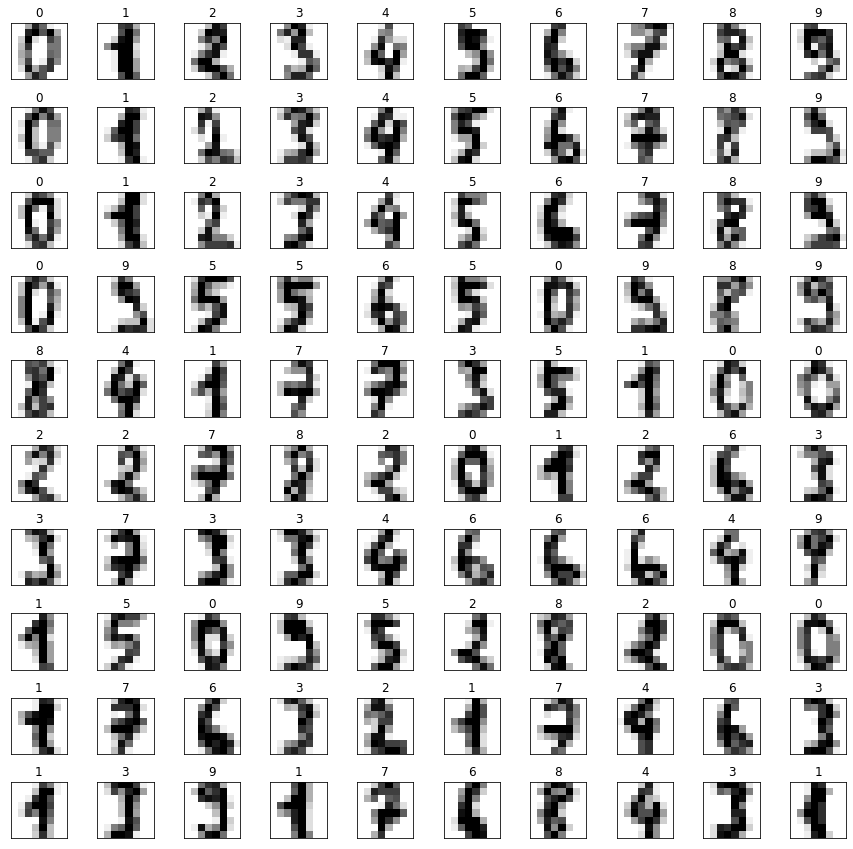

In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets

####MNIST手書き数字のデータ読み込みと確認####
digits = datasets.load_digits()
print(digits.keys())

####読み込んだ手書き数字データの画像表示####
#描画領域の確保
fig, axes = plt.subplots(10, 10, figsize=(15, 15), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.5, wspace=0.5))

#確保した描画領域に読み込んだ画像の最初の100枚を表示
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(digits.target[i])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   9. 154. 135.   3.   0.]
 [  0.   0.  11. 171. 208. 169.  56.   0.]
 [  0.   1. 128. 117.  10.  80. 128.   0.]
 [  0.  37. 148.   0.   0. 108.  99.   0.]
 [  0.  48. 145.  46. 119. 101.   4.   0.]
 [  0.  16. 168. 173.  72.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


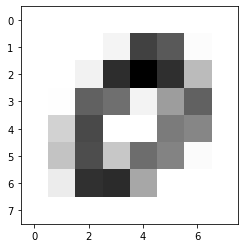

In [14]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.imshow(zeros_8[0], cmap=plt.cm.gray_r, interpolation='nearest')
print(digits.images[0])
print(zeros_8[0])

In [15]:
ki1=np.zeros((100,4,16,16))
for i in range(100):
    for j in range(4):
        for k in range(8):
            for l in range(8):
                ki1[i][j][j//2+3+k][j%2+3+l]=zeros_8[i][k][l]
# ki1=np.array([1.5 for i in range(62)])
num_ones=np.array([0.0 for i in range(8)])
qc,original_num_ones=function_n2(10,8,np.ravel(ki1[0])[1:1023])
print(original_num_ones)
qc.draw("mpl")
for i in range(256):
    for j in range(8):
        if(bin6(i,10)=='1'):
            num_ones[j]=num_ones[j]+original_num_ones[i]
print(num_ones)

ValueError: operands could not be broadcast together with shapes (1024,) (1022,) 

In [16]:
ki2=np.array([pi/2 for i in range(64)])
ki2[2]=ki2[2]+num_ones[0] ## # 0 #
ki2[5]=ki2[5]+num_ones[1] ## 1 2 3
ki2[6]=ki2[6]+num_ones[2] #4 5 6 #
ki2[7]=ki2[7]+num_ones[3] ## 7 # #
ki2[8]=ki2[8]+num_ones[4]
ki2[9]=ki2[9]+num_ones[5]
ki2[10]=ki2[10]+num_ones[6] 
ki2[13]=ki2[13]+num_ones[7]
ki2[29]=ki2[29]+num_ones[0] ## # 1 #
ki2[18]=ki2[18]+num_ones[1] ## 2 3 4
ki2[21]=ki2[21]+num_ones[2] #5 6 7 #
ki2[22]=ki2[22]+num_ones[3] ## 0 # #
ki2[23]=ki2[23]+num_ones[4]
ki2[24]=ki2[24]+num_ones[5]
ki2[25]=ki2[25]+num_ones[6]
ki2[26]=ki2[26]+num_ones[7]
ki2[42]=ki2[42]+num_ones[0] ## # 2 #
ki2[45]=ki2[45]+num_ones[1] ## 3 4 5
ki2[34]=ki2[34]+num_ones[2] #6 7 0 #
ki2[37]=ki2[37]+num_ones[3] ## 1 # /
ki2[38]=ki2[38]+num_ones[4]
ki2[39]=ki2[39]+num_ones[5]
ki2[40]=ki2[40]+num_ones[6]
ki2[41]=ki2[41]+num_ones[7]
ki2[57]=ki2[57]+num_ones[0] ## # 3 #
ki2[58]=ki2[58]+num_ones[1] ## 4 5 6
ki2[61]=ki2[61]+num_ones[2] #7 0 1 #
ki2[50]=ki2[50]+num_ones[3] ## 2 # #
ki2[53]=ki2[53]+num_ones[4]
ki2[54]=ki2[54]+num_ones[5]
ki2[55]=ki2[55]+num_ones[6]
ki2[56]=ki2[56]+num_ones[7]
qc,original_num_ones=function_n2(6,4,ki2[1:63])
print(original_num_ones)
qc.draw("mpl")
num_ones=np.array([0.0 for i in range(4)])
for i in range(16):
    for j in range(4):
        if(bin6(i,4)=='1'):
            num_ones[j]=num_ones[j]+original_num_ones[i]
print(num_ones)

{'0000': 73, '0010': 65, '1110': 75, '1001': 60, '0101': 51, '1010': 68, '0001': 58, '1111': 74, '0100': 70, '1000': 56, '0110': 73, '1101': 59, '0011': 57, '0111': 67, '1011': 63, '1100': 55}
[ 0.140625 -0.09375   0.015625 -0.109375  0.09375  -0.203125  0.140625
  0.046875 -0.125    -0.0625    0.0625   -0.015625 -0.140625 -0.078125
  0.171875  0.15625 ]


AttributeError: module 'numpy' has no attribute 'appay'

In [17]:
# ki2=np.array([pi/2 for i in range(64)])
# ki2[2]=ki2[2]+num_ones[0] ## # 0 #
# ki2[5]=ki2[5]+num_ones[1] ## 1 2 3
# ki2[6]=ki2[6]+num_ones[2] #4 5 6 #
# ki2[7]=ki2[7]+num_ones[3] ## 7 # #
# ki2[29]=ki2[29]+num_ones[0] ## # 1 #
# ki2[18]=ki2[18]+num_ones[1] ## 2 3 4
# ki2[21]=ki2[21]+num_ones[2] #5 6 7 #
# ki2[22]=ki2[22]+num_ones[3] ## 0 # #
# ki2[42]=ki2[42]+num_ones[0] ## # 2 #
# ki2[45]=ki2[45]+num_ones[1] ## 3 4 5
# ki2[34]=ki2[34]+num_ones[2] #6 7 0 #
# ki2[37]=ki2[37]+num_ones[3] ## 1 # /
# ki2[57]=ki2[57]+num_ones[0] ## # 3 #
# ki2[58]=ki2[58]+num_ones[1] ## 4 5 6
# ki2[61]=ki2[61]+num_ones[2] #7 0 1 #
# ki2[50]=ki2[50]+num_ones[3] ## 2 # #
# qc,original_num_ones=function_n2(6,4,ki2[1:63])
# print(original_num_ones)
# qc.draw("mpl")
# num_ones=np.appay([0.0 for i in range(4)])
# for i in range(16):
#     for j in range(4):
#         if(bin6(i,4)=='1'):
#             num_ones[j]=num_ones[j]+original_num_ones[i]
# print(num_ones)

sum=num_ones[0]+num_ones[1]+num_ones[2]+num_ones[3]